In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('ams18.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,GBC
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,GBC
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,GBC
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,GBC
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,GBC


In [4]:
len(df)

18458

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18458 entries, 0 to 18457
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18458 non-null  int64  
 1   N_Person           18458 non-null  int64  
 2   Xcenter            18458 non-null  float64
 3   Ycenter            18458 non-null  float64
 4   PerXmin            18458 non-null  float64
 5   PerYmin            18458 non-null  float64
 6   PerXmax            18458 non-null  float64
 7   PerYmax            18458 non-null  float64
 8   N_Handgun          18458 non-null  int64  
 9   HgXcenter          18458 non-null  float64
 10  HgYcenter          18458 non-null  float64
 11  HgXmin             18458 non-null  float64
 12  HgYmin             18458 non-null  float64
 13  HgXmax             18458 non-null  float64
 14  HgYmax             18458 non-null  float64
 15  Intersection       18458 non-null  object 
 16  Included_Center    184

In [6]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14214
Ycenter              14195
PerXmin              14222
PerYmin              14219
PerXmax              14222
PerYmax              14199
N_Handgun                5
HgXcenter             7290
HgYcenter             7288
HgXmin                7292
HgYmin                7292
HgXmax                7292
HgYmax                7291
Intersection             9
Included_Center          2
Intersection_Area     8423
Hg_Area               7292
Distance             18458
Ground_Truth             2
GT                       2
dtype: int64

In [7]:
df['Ground_Truth'].value_counts()

1    13199
0     5259
Name: Ground_Truth, dtype: int64

In [8]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,GBC,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,GBC,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,GBC,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,GBC,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,GBC,1,0,0,0,0,0,0,0,0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18458 entries, 0 to 18457
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18458 non-null  int64  
 1   N_Person                      18458 non-null  int64  
 2   Xcenter                       18458 non-null  float64
 3   Ycenter                       18458 non-null  float64
 4   PerXmin                       18458 non-null  float64
 5   PerYmin                       18458 non-null  float64
 6   PerXmax                       18458 non-null  float64
 7   PerYmax                       18458 non-null  float64
 8   N_Handgun                     18458 non-null  int64  
 9   HgXcenter                     18458 non-null  float64
 10  HgYcenter                     18458 non-null  float64
 11  HgXmin                        18458 non-null  float64
 12  HgYmin                        18458 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [10]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'GBC', 0: 'LR'}


In [11]:
print(df2['Ground_Truth'].value_counts())

1    13199
0     5259
Name: Ground_Truth, dtype: int64


In [12]:
df3 = df2.drop(columns=["GT"])

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18458 entries, 0 to 18457
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18458 non-null  int64  
 1   N_Person                      18458 non-null  int64  
 2   Xcenter                       18458 non-null  float64
 3   Ycenter                       18458 non-null  float64
 4   PerXmin                       18458 non-null  float64
 5   PerYmin                       18458 non-null  float64
 6   PerXmax                       18458 non-null  float64
 7   PerYmax                       18458 non-null  float64
 8   N_Handgun                     18458 non-null  int64  
 9   HgXcenter                     18458 non-null  float64
 10  HgYcenter                     18458 non-null  float64
 11  HgXmin                        18458 non-null  float64
 12  HgYmin                        18458 non-null  float64
 13  H

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14766, 28) (14766,)
(3692, 28) (3692,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8984229147694865
mean_test =  0.8961807791740748


,fit_time,score_time,test_score,train_score
0,0.097767,0.002993,0.881517,0.885469
1,0.093751,0.002988,0.903859,0.909324
2,0.093719,0.002992,0.897089,0.904282
3,0.093749,0.001995,0.909953,0.904884
4,0.091756,0.002990,0.879485,0.892392
5,0.094747,0.002990,0.899797,0.909022
6,0.096742,0.002990,0.903794,0.910835
7,0.099705,0.003988,0.894309,0.883672
8,0.097768,0.002990,0.893631,0.898420
9,0.101728,0.002991,0.898374,0.885929


In [17]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[2517,   98],
        [ 305,  772]],

       [[ 772,  305],
        [  98, 2517]]], dtype=int64)

                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
1                       N_Person    0.000387  0.001160
19      Intersection_Center_left    0.000998  0.002771
8                      N_Handgun    0.001002  0.003005
23           Intersection_Inside    0.003307  0.009921
20     Intersection_Center_right    0.004898  0.010166
0                          Frame    0.005754  0.007422
12                        HgYmin    0.012476  0.020860
5                        PerYmin    0.014127  0.021428
13                        HgXmax    0.014681  0.020352
15               Included_Center    0.022174  0.045023
2                        Xcenter    0.023633  0.035084
16             Intersection_Area    0.023803  0.062191
10        

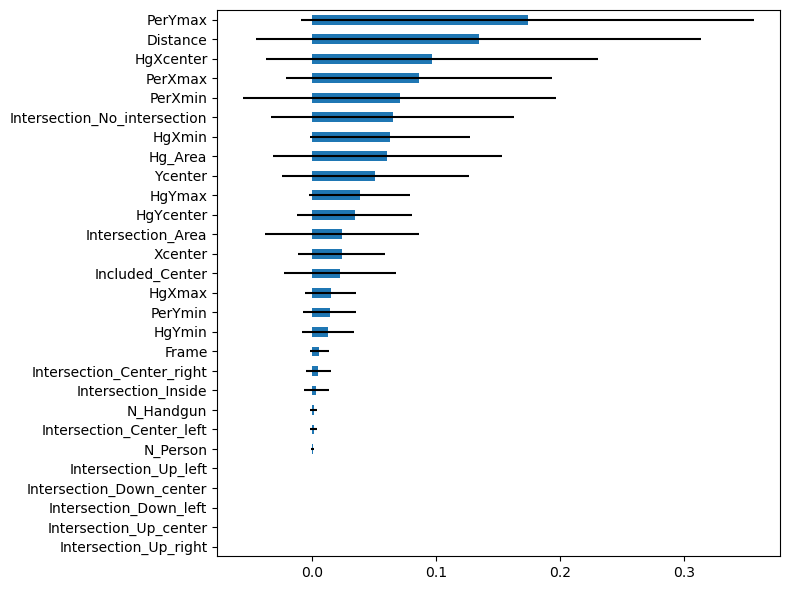

In [18]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1077
           1       0.89      0.96      0.93      2615

    accuracy                           0.89      3692
   macro avg       0.89      0.84      0.86      3692
weighted avg       0.89      0.89      0.89      3692



In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [20]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18458 entries, 0 to 18457
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18458 non-null  int64  
 1   N_Person                      18458 non-null  int64  
 2   Xcenter                       18458 non-null  float64
 3   Ycenter                       18458 non-null  float64
 4   PerXmin                       18458 non-null  float64
 5   PerYmin                       18458 non-null  float64
 6   PerXmax                       18458 non-null  float64
 7   PerYmax                       18458 non-null  float64
 8   N_Handgun                     18458 non-null  int64  
 9   HgXcenter                     18458 non-null  float64
 10  HgYcenter                     18458 non-null  float64
 11  HgXmin                        18458 non-null  float64
 12  HgYmin                        18458 non-null  float64
 13  H

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86635719, -1.00532805,  0.3866657 , -1.06165318,  0.40807562,
        -0.8027631 ,  0.34957527, -1.43577304, -0.49766993,  0.64820441,
        -1.26231312,  0.70108568, -1.18039247,  0.59393272, -1.33956334,
         1.17990343, -0.0518784 , -0.63146429, -0.69832775,  2.66576072,
        -0.28326037, -0.01803242, -0.01040989, -0.53856061, -1.08746064,
        -0.11999487, -0.06169952, -0.13261379],
       [-1.86418529, -1.00532805,  0.38638032, -1.06106243,  0.40709474,
        -0.8010747 ,  0.35002035, -1.43852843, -0.49766993,  0.64661147,
        -1.26316793,  0.69808752, -1.18104404,  0.59373207, -1.34062342,
         1.17990343, -0.04946823, -0.62559118, -0.69689985,  2.66576072,
        -0.28326037, -0.01803242, -0.01040989, -0.53856061, -1.08746064,
        -0.11999487, -0.06169952, -0.13261379],
       [-1.86201339, -1.00532805,  0.38700008, -1.06321772,  0.40856183,
        -0.80512754,  0.34973967, -1.43450715, -0.49766993,  0.64643313,
        -1.26458319,  0.6979

In [23]:
print(scaler.mean_)

[8.59320295e+02 8.79401885e-01 3.92880314e+02 3.82580094e+02
 3.05538725e+02 2.46254877e+02 4.80221903e+02 5.18905310e+02
 2.99219850e-01 3.10609467e+02 3.12671984e+02 2.87214552e+02
 2.93106478e+02 3.34004381e+02 3.32237489e+02 4.18030122e-01
 9.31619618e+02 2.03039723e+03 2.32142414e+02 1.23361144e-01
 7.42767364e-02 3.25062304e-04 1.08354101e-04 2.24834760e-01
 5.41824683e-01 1.41943873e-02 3.79239354e-03 1.72824791e-02]


In [24]:
print(scaler.scale_)

[4.60426493e+02 8.74741223e-01 2.12377607e+02 6.87579976e+01
 2.20151662e+02 1.11928603e+02 2.12828978e+02 3.91023792e+01
 6.01241572e-01 1.53150026e+02 9.71423202e+01 1.52406225e+02
 9.91118671e+01 1.54386548e+02 9.57454908e+01 4.93235176e-01
 1.67110808e+03 1.81940454e+03 1.37502086e+02 3.28851292e-01
 2.62220714e-01 1.80265537e-02 1.04087636e-02 4.17473461e-01
 4.98247625e-01 1.18291617e-01 6.14655293e-02 1.30321890e-01]


In [25]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [26]:
X_train.shape

(13843, 28)

In [27]:
y_train.value_counts()

1    9899
0    3944
Name: Ground_Truth, dtype: int64

In [28]:
X_test.shape

(4615, 28)

In [29]:
y_test.value_counts()

1    3300
0    1315
Name: Ground_Truth, dtype: int64

In [30]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[9.99999913e-01, 8.73537555e-08],
       [9.99999973e-01, 2.68459147e-08],
       [4.76473281e-06, 9.99995235e-01],
       ...,
       [2.17603713e-14, 1.00000000e+00],
       [9.99999398e-01, 6.02312441e-07],
       [6.13942133e-04, 9.99386058e-01]])

In [31]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[3239,   61],
        [  59, 1256]],

       [[1256,   59],
        [  61, 3239]]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1315
           1       0.98      0.98      0.98      3300

    accuracy                           0.97      4615
   macro avg       0.97      0.97      0.97      4615
weighted avg       0.97      0.97      0.97      4615



In [35]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.984251968503937
Score test =  0.9739978331527628


In [32]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

KeyboardInterrupt: 

In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))